In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import os

In [ ]:
import sys

In [ ]:
os.chdir('/.....')

In [ ]:
#Cleaning the initial dataset took a few steps. 

In [ ]:
#Step 1: Eliminate spaces in column strings

In [ ]:

hchar.columns = [x.strip().replace(' ', '_') for x in hchar.columns]

In [ ]:
#Step 2: Eliminate dollar signs in row values

In [ ]:
hchar['Average_Medicare_Payments'] = hchar['Average_Medicare_Payments'].str.replace('$','')

In [ ]:
#Step 3: Convert object row values to floats

In [ ]:
hchar['Average_Medicare_Payments'] = hchar['Average_Medicare_Payments'].astype('float')

In [ ]:
#Step 5: Encode targets for nominal values 

In [ ]:
def encode_target(df, target_column):
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

In [ ]:
df2, tgProvName = encode_target(hchar,"Provider_Name") #etc...

In [ ]:
#Save as csv file

In [ ]:
f2.to_csv('hospintarg.csv', sep='\t')

In [ ]:
#if desired, export to excel spreadsheet 

In [ ]:
from xlsxwriter.utility import xl_rowcol_to_cell
writer_orig = pd.ExcelWriter('simple.xlsx', engine='xlsxwriter')
final.to_excel(writer_orig, index=False, sheet_name='trim')
writer_orig.save()

In [ ]:
#Set target "y" 

In [ ]:
target2 = 'Average_Total_Payments'

In [ ]:
#Prune "X" values for endogenous variables. Also, take y out of your "X" set. 

In [ ]:
final.drop(final.columns[[0,2,3,5]], axis=1, inplace=True)

In [ ]:
columns = final.columns.tolist()

In [ ]:
columns = [c for c in columns if c not in['Average_Total_Payments','Average_Covered_Charges']]

In [ ]:
columns

In [ ]:
#['Provider_Id',
 'Provider_Zip_Code',
 'Total_Discharges',
 'Provider_Name_Target',
 'DRG_Definition_Target',
 'Provider_City_Target',
 'Provider_State_Target',
 'Hospital_Referral_Region_Description_Target']

In [ ]:
#RandomforestRegressor and ADAboost RandomforestRegressor for Average Total Payments

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
train2 = final.sample(frac=0.8, random_state=1)

In [ ]:
test2 = final.loc[~final.index.isin(train2.index)]

In [ ]:
print(train2.shape)


In [ ]:
#(130452, 10)

In [ ]:
print(test2.shape)

In [ ]:
#(32613, 10)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model1 = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1,oob_score=True)

In [ ]:
model1.fit(train2[columns], train2[target2])

In [ ]:
#RandomForestRegressor 
(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [ ]:
predictions2 = model1.predict(test2[columns])

In [ ]:
scoreRFR = model1.score(train2[columns], train2[target2])
scoreRFR
#0.92527479730230799

In [ ]:
error = mean_squared_error(predictions2, test2[target2])

In [ ]:
#importances 

In [ ]:
importances = model1.feature_importances_

In [ ]:
indices = np.argsort(importances)

In [ ]:
#Graphing Importances 
plt.plot(importances, label = 'Importances')

In [ ]:
#ADAboostRegressor 
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
clf = AdaBoostRegressor(RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1,oob_score=True))

In [ ]:
#This model fit took my macbook air about an hour 

model2 = clf.fit(train2[columns], train2[target2])

In [ ]:
adascore = model2.score(train2[columns], train2[target])

In [ ]:
adascore
#0.9747742529497686

In [ ]:
predictions3 = model2.predict(test2[columns])

In [ ]:
#Now we can do some interesting visualizations in matplotlib. First, a basic plot of y's and y hats to express model accuracy. 

In [ ]:
%pylab inline 

In [ ]:
import prettyplotlib

In [ ]:
plt.style.use('ggplot')
plt.figure()
scatter(X3,test2[target2], color='k', label='Target')
plt.plot(x,predictions3, color='g', label='RFR')
plt.plot(x,predictions2, color='w', label='ADA')
plt.title('Training vs. Prediction: RFR, AdaBoost',y=1.08)
plt.xlabel( 'Data' )
plt.axis(ymin=0)
plt.axis(xmin=0)
plt.ylabel('Average Inpatient Payments')
plt.savefig('FORESTYES2.png',transparent=True)
plt.legend(loc=2)
plt.rc('font', family='serif')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.savefig('FORESTYES7.png',transparent=True)
plt.show()

In [ ]:
#For demonstrative purposes 

In [12]:
os.chdir('...')

In [13]:
import os 

In [ ]:
from IPython.display import Image

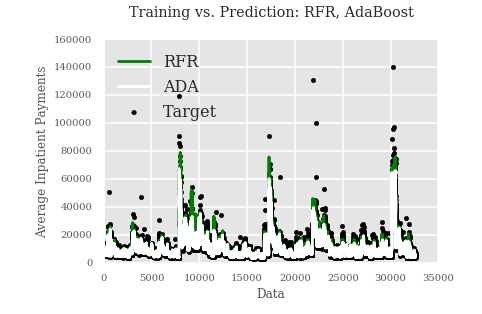

In [16]:
Image(filename='graph1.png')

In [8]:
#One could also visualize the number of identical matches between target and predicted values per models

In [14]:
#First, loop through the list of values adding overlapping values to a list. Rounded to Hundreths for Memory Conservation and visualization purposes 
test = test2['Average_Total_Payments']
pred2 = [round(float(i), 2) for i in predictions2]
 
tes2 = [round(float(i), 2) for i in test]

ADAoverlap = []
for x in tes2:
    for y in pred3:
        if x == y: 
            ADAoverlap += [x] 

In [ ]:
#Next, plot 

In [ ]:
width = 1/5
x = [1]
xa = [2]
xb = [1,2]
plt.bar(x, , width, color='', label = 'RFR: 909')
plt.bar(xa, 936, width, color='red', label = 'ADA: 936')
plt.title('Overlapping Predicted and Test Values: RFR v. ADA, Hundreths',y=1.08)
plt.rc('font', family='serif')
my_xticks = ['RFR','ADA']

plt.xticks(xb, my_xticks)



plt.savefig('BarLap.png')

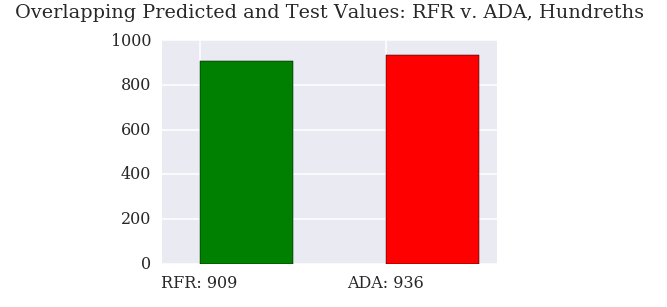

In [18]:
Image(filename='graph2.png')

In [ ]:
#Next, one can plot the R^values in a similar fashion 

In [ ]:
width = 1/5
x = [1]
xa = [2]
xb = [1,2]
plt.bar(x, scoreRFR, width, color='blue', label = 'RFR: .9243')
plt.bar(xa,
adascore, width, color='red', label = 'ADA: .9748')
plt.title('R^2 Values',y=1.08)
plt.rc('font', family='serif')
my_xticks = ['RFR','ADA']
legend(loc=8)

plt.xticks(xb, my_xticks)



plt.savefig('BarLapR.png') 

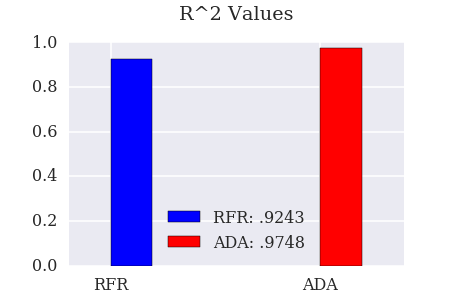

In [19]:
Image(filename='graph3.png')

In [ ]:
#Finally, one can plot a line of 1s, then compare the ratio of logged predicted/actual value. This way, one can see how close each model was to complete accuracy. It also shows how much each model was over or under the y values.

In [20]:
from math import log 

In [ ]:
#Do this for each model's predicted values 
r = list(map(lambda tes2, pred2: log(pred2/tes2), tes2,pred2))
n =  list(map(lambda tes3, pred3: log(pred2/tes2), tes2,pred2))

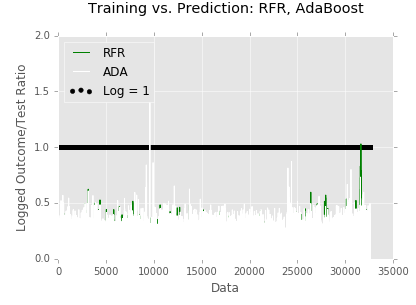

In [21]:
Image(filename='graph4.png')

In [ ]:
#We can see here that the ADA model came closer to the target values. 